# neo-domain


### Get test data

**Hi-C cool format matrix data**

* https://github.com/seqyuan/trackc_data/examples

**BxPC3 ChIP-seq data**

* https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM3178671

In [1]:
import cooler

import trackc as tc

BxPC3_chr18_25k = cooler.Cooler(
    "../../trackc_data/examples/BxPC3.chr18.mcool::/resolutions/25000"
)

zoom_regions = ["18:47400000-48280000", "18:75280000-74030000"]
neo_domain_regions = ["18:47950000-48280000", "18:75280000-74850000"]

tumor_zoom = tc.tl.extractContactRegions(clr=BxPC3_chr18_25k, row_regions=zoom_regions)

maxrange: 200 minrange: 10


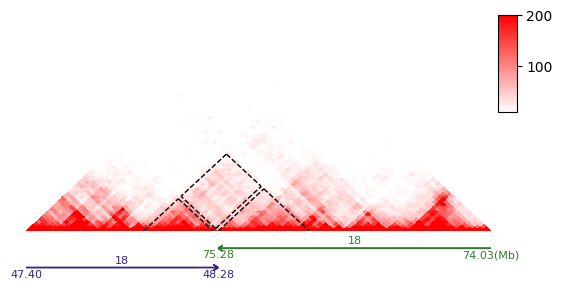

In [2]:
ten = tc.tenon(figsize=(6, 1))
ten.add(pos="bottom", height=2.8, hspace=0.05)
ten.add(pos="bottom", height=0.6, hspace=0.05)


tc.pl.mapC(
    ax=ten.axs(0),
    mat=tumor_zoom.cmat,
    map_type="tri",
    maxrange=200,
    minrange=10,
    ax_on=False,
)
tc.pl.mapc_markline(
    ax=ten.axs(0),
    row_regions=tumor_zoom.row_regions,
    map_type="triangle",
    mark_regions=neo_domain_regions,
    binsize=25000,
    map_order=0,
    symmetric=False,
    show_regions_edge=False,
)

tc.pl.multi_scale_track(
    ten.axs(1), regions=zoom_regions, scale_adjust="Mb", intervals=2, tick_rotation=0
)

# tc.savefig('trackc_neotad.pdf')